## 기본 모듈 import

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.max_columns = None

<AxesSubplot:title={'center':'한글'}>

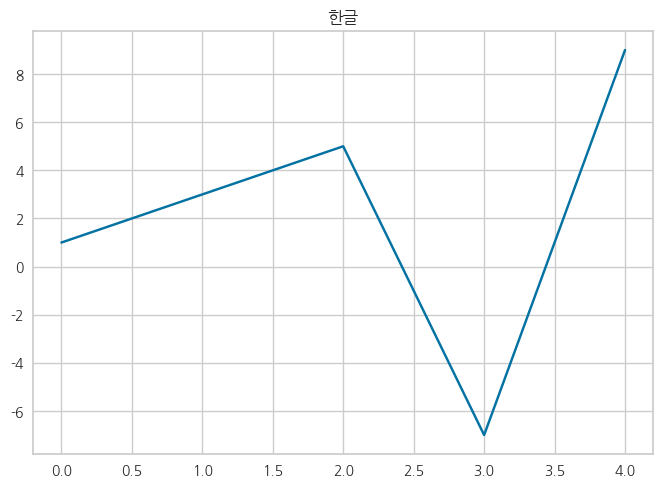

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc("font", family='NanumGothic')
plt.rc("axes", unicode_minus=False)

pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

## 데이터셋 로드

In [27]:
dataset =  pd.read_csv('data/20220217_KT.txt', encoding='cp949', sep='|')

display(dataset.shape)
dataset.head()

(2819174, 20)

,계약코드,체납액,미납액,수납액,최초연체개월수,최종연체개월수,나이,체납액분류,회수분류,최초연체개월분류,위임월,주민종류,연령대,성별,지점,위임연락처여부,당사획득연락처여부,위임주소여부,당사획득주소여부,초본주소여부
0,9170101,5017230,5017230,0,19,19,50.0,(I) 500만원 이상~ 1000만원 미만,미수납,(F)19~24 연체,01월,개인,(E) 50대,(A)남성,경기도,미존재,미존재,01,11,11
1,9170101,6800,6800,0,11,11,50.0,(A) 1만원 미만,미수납,(D)7~12 연체,01월,개인,(E) 50대,(A)남성,부산시,미존재,미존재,미존재,미존재,미존재
2,9170101,3478250,3478250,0,12,12,21.0,(H) 100만원 이상~ 500만원 미만,미수납,(D)7~12 연체,01월,개인,(B) 20대,(A)남성,전라남도,3,미존재,01,미존재,미존재
3,9170101,411110,411110,0,22,22,21.0,(F) 30만원 이상~ 50만원 미만,미수납,(F)19~24 연체,01월,개인,(B) 20대,(B)여성,전라남도,미존재,미존재,미존재,11,미존재
4,9170101,334230,334230,0,39,60,20.0,(F) 30만원 이상~ 50만원 미만,미수납,(H)37~48 연체,01월,개인,(B) 20대,(A)남성,경기도,3,미존재,미존재,미존재,미존재


## 학습데이터 정의

In [28]:
data = dataset.copy()

In [29]:
data['수납액'].value_counts()

0          2682148
100000        3789
200000        2126
50000         1866
300000        1290
            ...   
73602            1
302885           1
477651           1
177466           1
1165951          1
Name: 수납액, Length: 56437, dtype: int64

<AxesSubplot:ylabel='Density'>

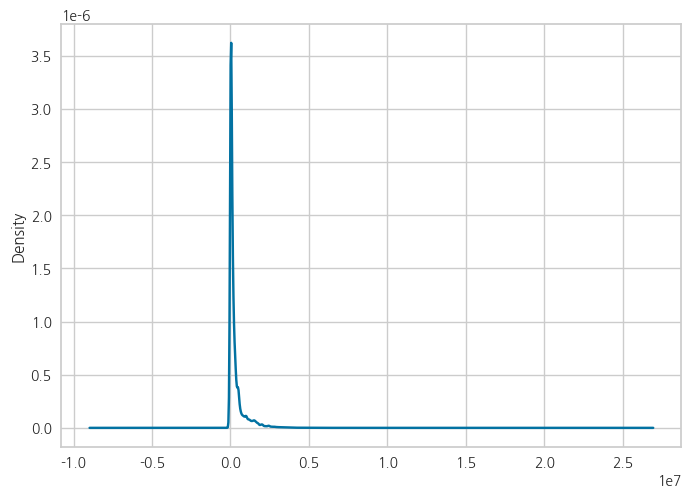

In [30]:
data['collected'] = data['수납액']

data.loc[data['collected'] != 0, 'collected'].plot(kind='kde')

In [31]:
data.isnull().sum()

계약코드           0
체납액            0
미납액            0
수납액            0
최초연체개월수        0
최종연체개월수        0
나이           541
체납액분류          0
회수분류           0
최초연체개월분류       0
위임월            0
주민종류           0
연령대            0
성별             0
지점             0
위임연락처여부        0
당사획득연락처여부      0
위임주소여부         0
당사획득주소여부       0
초본주소여부         0
collected      0
dtype: int64

In [32]:
data['나이'].value_counts()

0.0      405137
29.0      49204
38.0      48740
49.0      48662
39.0      48551
          ...  
118.0        27
2.0          25
1.0          24
115.0        14
112.0        13
Name: 나이, Length: 122, dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819174 entries, 0 to 2819173
Data columns (total 21 columns):
 #   Column     Dtype  
---  ------     -----  
 0   계약코드       int64  
 1   체납액        int64  
 2   미납액        int64  
 3   수납액        int64  
 4   최초연체개월수    int64  
 5   최종연체개월수    int64  
 6   나이         float64
 7   체납액분류      object 
 8   회수분류       object 
 9   최초연체개월분류   object 
 10  위임월        object 
 11  주민종류       object 
 12  연령대        object 
 13  성별         object 
 14  지점         object 
 15  위임연락처여부    object 
 16  당사획득연락처여부  object 
 17  위임주소여부     object 
 18  당사획득주소여부   object 
 19  초본주소여부     object 
 20  collected  int64  
dtypes: float64(1), int64(7), object(13)
memory usage: 451.7+ MB


In [34]:
data.columns

Index(['계약코드', '체납액', '미납액', '수납액', '최초연체개월수', '최종연체개월수', '나이', '체납액분류',
       '회수분류', '최초연체개월분류', '위임월', '주민종류', '연령대', '성별', '지점', '위임연락처여부',
       '당사획득연락처여부', '위임주소여부', '당사획득주소여부', '초본주소여부', 'collected'],
      dtype='object')

In [35]:
features = [
#     '계약코드',
    '체납액',
#     '미납액',
#     '수납액',  ## target
    '최초연체개월수', 
    '최종연체개월수', 
    '나이', 
#     '체납액분류',
#     '회수분류',
#     '최초연체개월분류', 
    '위임월', 
    '주민종류', 
#     '연령대', 
    '성별', 
    '지점', 
    '위임연락처여부',
    '당사획득연락처여부', 
    '위임주소여부', 
    '당사획득주소여부', 
    '초본주소여부'] 
target = 'collected'

In [36]:
x = data[features]
y = data[target]
     
xy = pd.concat([x, y], axis=1)

display(xy.shape)
xy.head()

(2819174, 14)

,체납액,최초연체개월수,최종연체개월수,나이,위임월,주민종류,성별,지점,위임연락처여부,당사획득연락처여부,위임주소여부,당사획득주소여부,초본주소여부,collected
0,5017230,19,19,50.0,01월,개인,(A)남성,경기도,미존재,미존재,01,11,11,0
1,6800,11,11,50.0,01월,개인,(A)남성,부산시,미존재,미존재,미존재,미존재,미존재,0
2,3478250,12,12,21.0,01월,개인,(A)남성,전라남도,3,미존재,01,미존재,미존재,0
3,411110,22,22,21.0,01월,개인,(B)여성,전라남도,미존재,미존재,미존재,11,미존재,0
4,334230,39,60,20.0,01월,개인,(A)남성,경기도,3,미존재,미존재,미존재,미존재,0


## 학습 및 예측

In [37]:
# from pycaret.classification import *  # 분류
from pycaret.regression import *      # 회귀
# from pycaret.clustering import *      # 군집
# from pycaret.anomaly import *         # 이상 탐지
# from pycaret.arules import *          # 연관 규칙

In [38]:
clf = setup(data=xy, 
            target=target, 
            session_id=123,
            silent=True) 

,Description,Value
0,session_id,123
1,Target,collected
2,Original Data,"(2819174, 14)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,9
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1973421, 62)"


In [39]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,22785.5747,33514005634.2707,183068.3087,-0.7191,2.7789,111.9719
1,20931.4877,28466415530.5264,168719.9322,-0.6556,2.7400,52.3570
2,21478.3724,28839684671.8245,169822.5093,-0.4798,2.7557,357.2356
3,21609.1953,30394963651.8214,174341.5144,-0.5100,2.7601,54.7107
4,21867.2113,29951746186.1659,173065.7279,-0.6520,2.7715,69.5821
5,21601.5374,28547503013.1554,168960.0634,-0.5922,2.7647,74.0999
6,22019.4704,30244206592.5034,173908.6156,-0.7145,2.7641,116.0872
7,21471.9425,29031015769.9676,170384.9048,-0.6723,2.7568,10.4387
8,21286.8015,30066478296.3036,173396.8809,-0.5966,2.7382,38.3074


In [40]:
# ensembled_models = ensemble_model(dt)

In [41]:
# predict_model(data=dataset, estimator=ensembled_models)
prediction = predict_model(data=xy, estimator=dt)
prediction

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,6439.5030,8680616315.5503,93169.8251,0.5313,1.5077,43.2271


,체납액,최초연체개월수,최종연체개월수,나이,위임월,주민종류,성별,지점,위임연락처여부,당사획득연락처여부,위임주소여부,당사획득주소여부,초본주소여부,collected,Label
0,5017230,19,19,50.0,01월,개인,(A)남성,경기도,미존재,미존재,01,11,11,0,0.0
1,6800,11,11,50.0,01월,개인,(A)남성,부산시,미존재,미존재,미존재,미존재,미존재,0,0.0
2,3478250,12,12,21.0,01월,개인,(A)남성,전라남도,3,미존재,01,미존재,미존재,0,0.0
3,411110,22,22,21.0,01월,개인,(B)여성,전라남도,미존재,미존재,미존재,11,미존재,0,0.0
4,334230,39,60,20.0,01월,개인,(A)남성,경기도,3,미존재,미존재,미존재,미존재,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819169,892130,52,61,0.0,06월,외국인,(Z)기타,서울,미존재,미존재,미존재,미존재,미존재,0,0.0
2819170,158680,55,55,0.0,06월,개인사업자,(Z)기타,서울,미존재,미존재,미존재,미존재,미존재,0,0.0
2819171,147270,67,67,44.0,06월,개인,(A)남성,전라남도,미존재,미존재,미존재,11,01,0,0.0
2819172,105150,28,34,45.0,06월,개인,(A)남성,서울,미존재,미존재,미존재,미존재,미존재,0,0.0


In [42]:
prediction[prediction['Label'] > 10000].head()

,체납액,최초연체개월수,최종연체개월수,나이,위임월,주민종류,성별,지점,위임연락처여부,당사획득연락처여부,위임주소여부,당사획득주소여부,초본주소여부,collected,Label
10,2219670,9,11,20.0,01월,개인,(A)남성,서울,J,미존재,01,11,01,0,2860050.0
11,11850,27,27,19.0,01월,개인,(A)남성,서울,2,미존재,01,미존재,미존재,11850,11850.0
17,89490,4,4,18.0,01월,개인,(B)여성,충청남도,3,3,01,미존재,미존재,89490,89490.0
28,188710,4,7,14.0,01월,개인,(A)남성,충청남도,3,미존재,미존재,미존재,미존재,70000,70000.0
36,13170,19,19,50.0,01월,개인,(B)여성,경기도,2,미존재,01,미존재,미존재,13170,13170.0


## 모델 분석

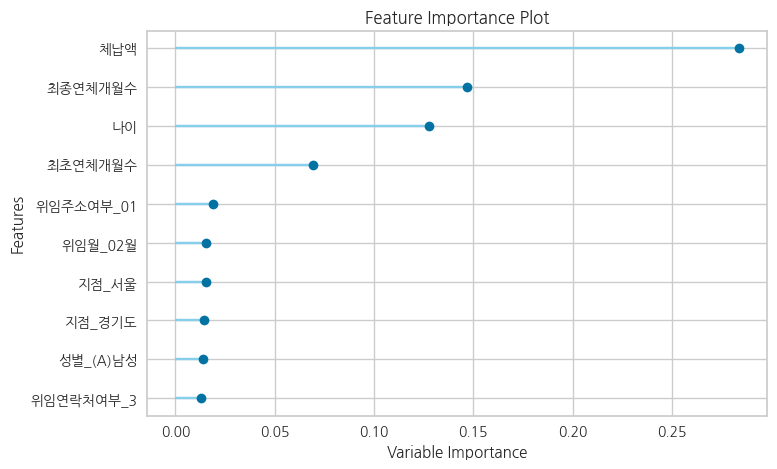

In [43]:
plot_model(dt, plot='feature')

In [45]:
# plot_model(dt, plot='confusion_matrix')

In [ ]:
interpret_model(dt)

In [ ]:
# interpret_model(dt, plot='reason')

## 모든 모델 학습

In [ ]:
best_model = compare_models(sort='Accuracy', n_select=3, fold=5)
print(best_model)

In [ ]:
blended_models = blend_models(best_models, fold=5)

## 한글 테스트

In [24]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

# 운영체제에 맞는 font_family 찾기 
font_family = get_font_family()
display(font_family)

# 그래프 스타일 설정
# plt.style.use("fivethirtyeight")
# plt.style.use("bmh")

# dark mode 사용자를 위한 스타일 추천
# plt.style.use("dark_background")
plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

# 한글폰트 확인
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
/bin/bash: fc-cache: command not found


AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'